# SciPy Hacking w/a New Horizons LORRI Image of Pluto

_Ben Kamphaus, PhD_

LORRI captures panchromatic images, meaning that it's a single grayscale intensity image. This image was downloaded from the New Horizons [website](http://pluto.jhuapl.edu/soc/Pluto-Encounter/view_obs.php?image=data/pluto/level2/lor/jpeg/029917/lor_0299174713_0x632_sci_5.jpg&utc_time=2015-07-14%3Cbr%3E10:13:14%20UTC&description=&target=PLUTO&range=0.1M%20km&exposure=150%20msec). LORRI captures light from wavelengths in the visible range, and up a little bit into the near infrared. [[1]]( http://www.boulder.swri.edu/pkb/ssr/ssr-lorri.pdf)

In [7]:
import numpy as np
import scipy
from scipy import ndimage as img
from skimage import filters
from matplotlib import pyplot as plt
%matplotlib inline

We just use the basic ndimage io utility to read in the grayscale JPEG image. The resulting image contains byte scaled DN values.

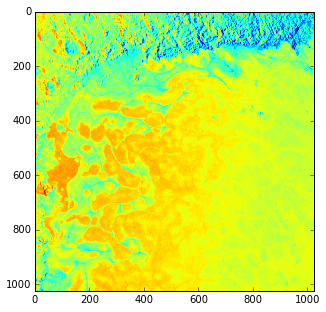

In [120]:
pluto = img.imread("pluto.jpg")
plt.figure(figsize=(5, 7))
plt.imshow(pluto)
plt.show()

Default stretches applied to entire images often create a washed out image where a lot of variation between features isn't easily visible. Looking at a histogram of the values can suggest a good range to select for an image stretch.

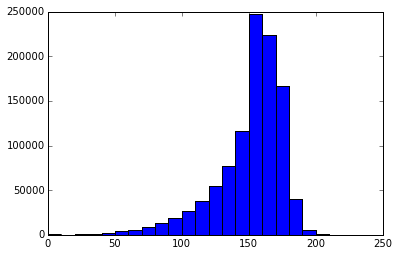

In [25]:
plt.hist(np.ravel(pluto), bins=range(0,250,10))
plt.show()

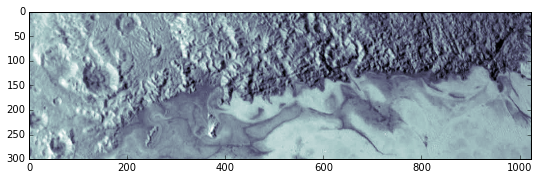

In [123]:
plt.figure(figsize=(9,5))
imgplot = plt.imshow(pluto[0:300], cmap='bone', clim=(30,205))

Here we use a basic sobel filter, which can be used for rudimentary edge enhancement/detection, cropping the image to the rough terrain near the (top of image).

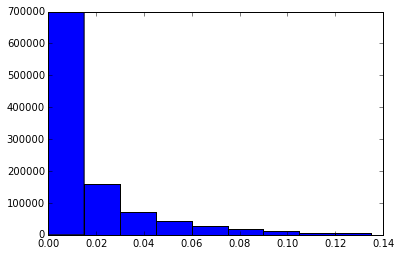

In [51]:
psob = filters.sobel(pluto)
plt.hist(np.ravel(psob), bins=np.arange(0,0.15,0.015))
plt.show()

In this case, it's actually more interesting to look at the overall stats - we're interested in the variation at above average values, so we set the stretch accordingly.

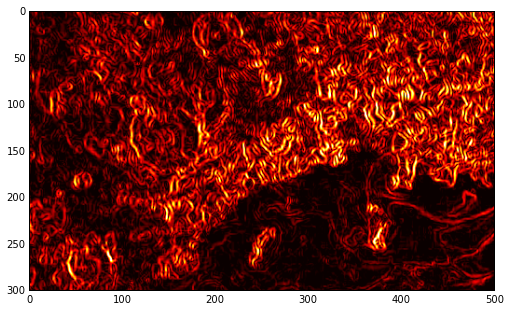

In [129]:
plt.figure(figsize=(9,5))
plt.imshow(psob[:300, :500], cmap='hot', clim=(0.010, 0.20))
plt.show()

In [67]:
psob_stats = (np.max(psob), np.min(psob), np.mean(psob))
print(psob_stats)

(0.28618888055903297, 0.0, 0.018369402795072973)


Now we're going to look at combining the images into something of a weighted image - the combination of the panchromatic intensity and the 'edginess' from the sobel filter.

In [18]:
orig_stats = (np.max(pluto), np.min(pluto), np.mean(pluto))
print(orig_stats)

(255, 0, 150.47729301452637)


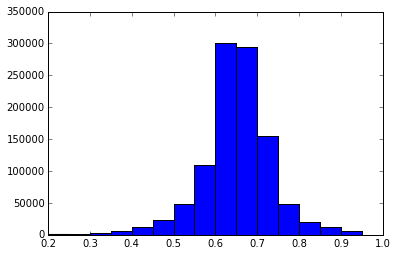

In [77]:
psob_half = psob/0.286
pluto_half = pluto/255.
combo = psob_half + pluto_half

# glossed over, but some trial and error on selecting range. Could also
# be more deliberate in looking at e.g. min, max, median, mean first.
plt.hist(np.ravel(combo), np.arange(0.2,1.0,0.05))
plt.show()

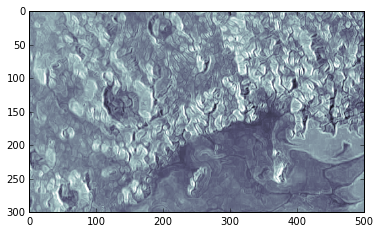

In [125]:
plt.imshow(combo[:300,:500], cmap='bone', clim=(0.1,1.1))

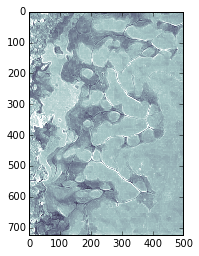

In [82]:
plt.imshow(combo[300:,:500], cmap='bone', clim=(0.2,0.9))

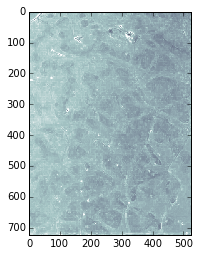

In [113]:
plt.imshow(combo[300:,500:], cmap='bone', clim=(0.3,0.8))

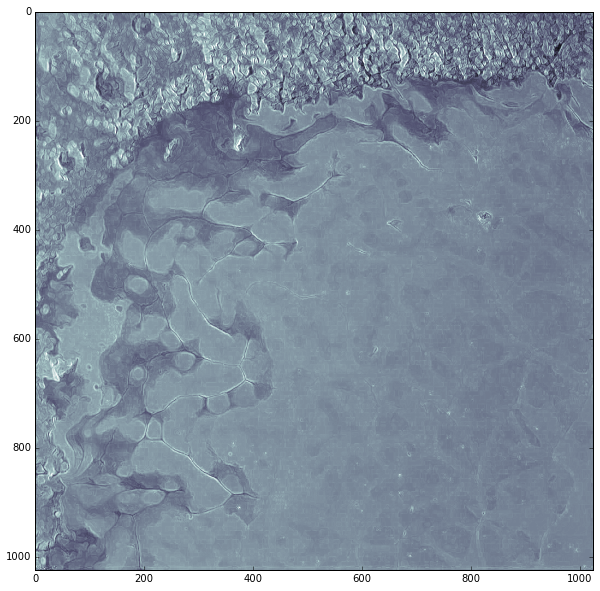

In [136]:
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(combo, cmap='bone', clim=(0.0,1.2))
plt.show()

Just for fun, let's play with a few more color maps.

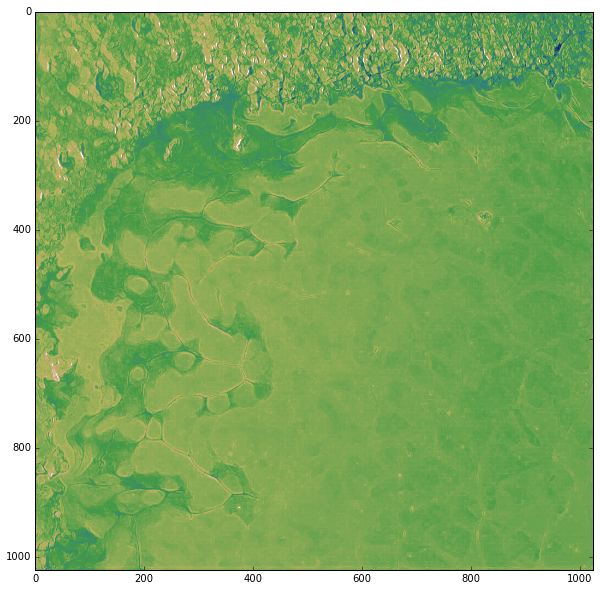

In [131]:
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(combo, cmap='gist_earth', clim=(0.0,1.2))
plt.show()

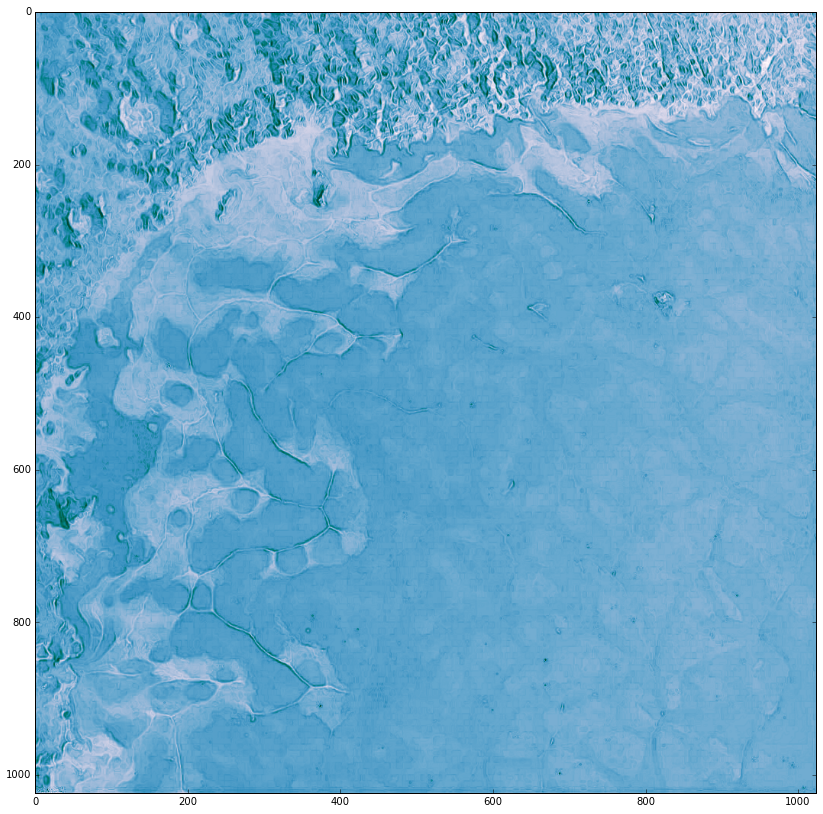

In [137]:
# my favorite
plt.figure(figsize=(14, 14))
imgplot = plt.imshow(combo, cmap='PuBuGn', clim=(0.1,1.2))
plt.savefig("pluto_combo.png")